<a href="https://colab.research.google.com/github/veroggg79/AMORTIZATIONS/blob/main/section3_regex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 3: Expresiones Regulares en Python

# 3.1. Raw Strings
Son cadenas de texto en la que los caracteres de escape como "\n" (salto de línea), "\t" (tabulación), etc... no se interpretan de manera especial si no de manera literal. Para definir un *raw string* se coloca una "r" o "R" antes de las comillas de la cadena.

Son útiles cuando se trabaja con expresiones regulares y rutas de archivos en Windows.

In [ ]:
# \n, \t, \s, \f...

normal_string = "Hello\n\tWorld"
print("Normal String:", normal_string)

raw_string = r"Hello World\n\tWorld"
print("Raw String:", raw_string)

windows_route = "C:\\new_folder\file.txt"
print("Windows Route:", windows_route)

raw_windows_route = r"C:\\new_folder\file.txt"
print("Windows Route as Raw String:", raw_windows_route)

Normal String: Hello
	World
Raw String: Hello World\n\tWorld
Windows Route: C:\new_folderile.txt
Windows Route as Raw String: C:\\new_folder\file.txt


# 3.2. Expresiones Regulares - Teoría General

**Nota:** página útil para probar expresiones regulares: https://regex101.com/

# 3.2.1. Conceptos generales

# Qué es una expresión regular?

Una expresión regular (regex) es una secuencia de caracteres que forma un patrón de búsqueda. Este patrón se utiliza para encontrar, verificar o manipular texto dentro de una cadena.

**Aplicaciones**
- Buscar patrones específicos en un texto, como números de teléfono, direcciones de correo electrónico, fechas, etc.

- Validar formatos de datos, asegurando que una cadena cumple con ciertas reglas (por ejemplo, que una contraseña tenga al menos 8 caracteres, incluyendo una mayúscula y un número).

- Reemplazar partes de un texto que coinciden con un patrón determinado (por ejemplo, cambiar todas las ocurrencias de una palabra por otra en un documento).

- Extraer información específica de un texto, como todos los números en un párrafo o los enlaces en un HTML.

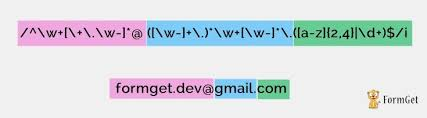

# Patrones de caracteres
Es el bloque básico para buscar patrones en una expresión regular. Simplemente se colocan los caracteres o palabras sobre los cuales queremos buscar coincidencias:

In [ ]:
# PROBLEMA: Hallar las coincidencias de la letra a

string = "this is a great test"
regex = r"a"
# RESULTADO: ["a", "a"]

Para ciertos caracteres especiales (.?\*+ etc...) necesitamos agregar un "\\", de ésta forma la expresión regular lo toma como un caracter literal. En estos casos debemos recordar usar *raw strings* para que Python también tome los caracteres de manera literal:

In [ ]:
# PROBLEMA: Hallar las coincidencias del punto "."

string = "This. Is. a test."
regex = r"\."
# RESULTADO: [".", ".", "."]

# Conjuntos

Los conjuntos son colecciones de caracteres colocados entre corchetes [] donde cualquier elemento dentro del conjunto puede ser una coincidencia para la expresión regular:

In [ ]:
# PROBLEMA: Encontrar los caracteres que son vocales

string = "this ^ is a big text"
regex = "[aeiou]"
# RESULTADO: ["i", "i", "a", "i", "e"]

Usando conjuntos también podemos escapar caracteres especiales como el punto (.), el asterisco (*), la suma (+), el signo de interrogación (?), etc:

In [ ]:
# PROBLEMA: Hallar las coincidencias del punto "."

string = "This. Is. a test."
regex = "[.]"
# RESULTADO: [".", ".", "."]

# Rangos de caracteres
Usando conjuntos podemos crear rangos de caracteres usando el caracter -

Ejemplos comunes:
- [a-z]: Captura cualquier caracter entre la a y la z (minúsculas).\
- [A-Z]: Captura cualquier caracter entre la a y la z (mayúsculas).\
- [a-zA-Z]: Captura cualquier caracter entre la a y la z (sin importar mayúsculas o minúsculas).\
- [0-9]: Captura cualquier caracter numérico.

In [ ]:
# PROBLEMA: Encontrar todos los números en la cadena de caracteres

string = "LLevo 10 años (desde 2004) trabajando con 3 lenguajes de programación diferentes."
regex = "[0-9]"
# RESULTADO: ["1", "0", "2", "0", "0", "4", "3"]

# PROBLEMA: Encontrar todas las letras del abecedario en la cadena de caracteres

string = "Calle 123. Apto 45"
regex = "[a-zA-Z]"
# RESULTADO: ["C", "a", "l", "l", "e", "A", "p", "t", "o"]

# PROBLEMA: Encontrar las coincidencias de caracteres de (a, b, c, d, x, y, z, 0, 1, 2, 3)
string = "x-ray 3 won't work for this test"
regex = "[a-dx-z0-3]"
# RESULTADO: ["x", "a", "y", "3"]

# 3.2.2. Metacaracteres
Son caracteres con un significado especial que permiten definir reglas dentro de la expresión regular.

# El punto (dot) (.)

Representa cualquier caracter EXCEPTO el caracter de salto de línea (\n). Es decir, puede ser una letra, un número, un signo de puntuación, un signo $, espacio en blanco, etc.

In [ ]:
# PROBLEMA: Encontrar las coincidencias de cualquier caracter en la cadena de caracteres

string = "Hello World_"
regex = "."
# RESULTADO = ["H", "e", "l", "l", "o", " ", "W", "o", "r", "l", "d", "_"]

# El signo de intercalación (caret) (^)

Se usa para especificar que la coincidencia debe estar en el incio de la cadena de caracteres.

In [ ]:
# PROBLEMA: Hallar las coincidencias de la palabra "apple" solo al inicio de la cadena de caracteres

string = "apple grows on an apple tree"
regex = "^apple"
# RESULTADO = ["apple"]

También sirve para negar conjuntos, es decir, omitirá el caracter que tenga dicha negación:

In [ ]:
# PROBLEMA: Encontrar los caracteres que NO son vocales

string = "this ^ is a big text"
regex = "[^aeiou]"
# RESULTADO: ["t", "h", "s", " ", "^", " ", "s", " ", " ", b", "g",, " ", "t", "x", "t"]

# Debe colocarse al principio del texto, si no se toma como un caracter literal

string = "this ^ is a big text"
regex = "[a^eiou]"
# RESULTADO: ["i", "^", "i", "a", "i", "e"]

# El signo dolar ($)
Se usa para especificar que la concidencia debe finalizar la cadena de caracteres antes de cada salto de línea o al final de cada línea.

In [ ]:
# PROBLEMA: Determinar si la cadena de caracteres termina con un punto o no

string = "Hello World."
regex = "\.$"
# RESULTADO: ["."]

# Patrón ^...$

Podemos hacer uso del caret (^) y del signo dólar ($) para especificar patrones que deben hacer match preciso. Es decir, comenzar y finalizar con los caracteres indicados. Se usa para hacer coincidencia de toda la cadena de caracteres con toda la expresión regular.

In [ ]:
# PROBLEMA: Determinar si la cadena de caracteres comienza con E, tiene un número en la mitad y finaliza con una S

string = "E9S"
regex = "^[A-Z][0-9][A-Z]$"
# RESULTADO: ["E9S"]

# 3.2.3. Cuantificadores

Los cuantificadores sirven para especificar cuántas veces queremos repetir un patrón determinado de la expresión regular.

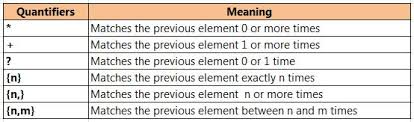

# 3.2.3.1. El asterisco (*):

El patrón debe estar 0 o muchas veces consecutivas, toma tantas veces como pueda (greedy).

In [ ]:
# PROBLEMA: Encontrar los números con dos o más decimales en la cadena de caracteres

string = "The Dow was up 504 points, or 1.3223%, in recent trading. The S&P 500 was up 1.5%. The Nasdaq Composite was up 2.22%, while the Russell 2000 was up 2.7%."
regex = "[0-9]\.[0-9][0-9][0-9]*"
# RESULTADO: ["1.3223", "2.22"]

# 3.2.3.2. El más (+):

El patrón debe estar mínimo una vez o muchas veces consecutivas, toma tantas veces como pueda (greedy).

In [ ]:
# PROBLEMA: Encontrar los números en la siguiente cadena de caracteres

string = "The Dow was up 504 points, or 1.3%, in recent trading. The S&P 500 was up 1.5%. The Nasdaq Composite was up 2.2%, while the Russell 2000 was up 2.7%."
regex = "[0-9]+"
# RESULTADO: ["504", "1", "3", "500", "1", "5", "2", "2", "2000", "2", "7"]


# 3.2.3.3. El signo pregunta (?): para patrones opcionales

Indica que el patrón debe estar 0 o 1 vez. Es decir, se utiliza cuando queremos patrones opcionales:

In [ ]:
# PROBLEMA: Encontrar todas las coincidencias de la palabra "apple" sin importar si es singular o plural

string = "These apples are from that apple tree"
regex = "apples?"
# RESULTADO: ["apples", "apple"]

# 3.3. Secuencias especiales

Estas secuencias comienzan con una barra invertida \ seguida de otro carácter y se utilizan para encontrar patrones dentro de las expresiones regulares, cada una con significado propio.

# Secuencia de límite de palabra \\b
Se usa para delimitar donde debe comenzar o terminar un patrón. Es decir, si está al comienzo indica que la coincidencia debe comenzar por dicho patrón, y si está al final, que debe terminar por ese patrón.

In [ ]:
# PROBLEMA: Encontrar las coincidencias para la palabra "log"
import re

# Sin usar \b
string = "catalog of log"
regex = r"log"
result = re.findall(regex, string)
print("Result:", result)

# Usando \b
string = "catalog of log"
regex = r"\blog\b"
result = re.findall(regex, string)
print("Result:", result)

Result: ['log', 'log']
Result: ['log']


# Secuencia de dígito \\d

Se usa para indicar que el patrón debe ser un dígito, es equivalente al conjunto [0-9]

In [ ]:
# PROBLEMA: Encontrar los números en la cadena de caracteres

string = "3 were the companies that broke yesterday August 14th"
regex = r"\d+"
# RESULTADO: ["3", "14"]

# Secuencia de no dígito \\D
Se usa para indicar que el patrón NO debe ser un dígito. Es equivalente al conjunto negado [^0-9]

In [ ]:
# PROBLEMA: Encontrar los caracteres que NO sean números en la cadena de caracteres

string = "3 were the companies that broke yesterday August 14th"
regex = r"\D+"
# RESULTADO: ["were the companies that broke yesterday August", "th"]

# Secuencia de palabra \w
Coincide con cualquier caracter alfanumérico y el guión bajo (equivalente a [a-zA-Z0-9_]).

In [ ]:
# PROBLEMA: Encontrar los códigos de lenguaje por país en la cadena de caracteres (xx_XX)

string = "en_US or es_US?"
regex = "\w{5}"
# RESULTADO: ["en_US", "es_US"]

# Secuencia de no palabra \W

Coincide con cualquier caracter que no coincida con \\w. Equivalente a [^0-9a-zA-Z]

In [ ]:
# PROBLEMA: Identificar los espacios en blanco de la cadena de caracteres

string = "This is a sentence"
regex = "\W"
# RESULTADO: [" ", " ", " "]

# Secuencia de espacio en blanco \\s
Se puede usar para referirse al espacio en blanco

In [ ]:
# PROBLEMA: Identificar los espacios en blanco de la cadena de caracteres

string = "This is a sentence"
regex = "\s"
# RESULTADO: [" ", " ", " "]

# Secuencia de no espacio en blanco \\S

Coincide con todos los caracteres que no sean espacios en blanco

In [ ]:
# PROBLEMA: Identificar los caracteres que no son espacios en blanco de la cadena de caracteres

string = "This is a sentence"
regex = "\S+"
# RESULTADO: ["This", "is", "a", "sentence"]

# Ejercicio Práctico:
Suponiendo que un código postal está compuesto por 5 a 6 números, construya una expresión regular para encontrar los zipcodes dentro de una cadena de caracteres:

In [ ]:
text = "I sent the package to an address in the zipcode 45450 and then another to 450560"

regex = r"\d{5}[0-9]?"
# regex = r"[0-9][0-9]?"
# regex = r"\d{5,6}"
# RESULT: ["45450", "450560"]


# Ejercicio Práctico:
Suponga que una fecha solo está disponible en el formato DD/MM/YYYY. Construya una expresión regular que encuentre dichas fechas en un texto dado. No tenga en cuenta los rangos de los números.

In [ ]:
text = "Mi fecha de graduación es 07/09/2024 y me iré de viaje el 03/01/2025" # XX/XX/XXXX

regex = r"\d{2}/\d{2}/\d{4}"
# regex = r"(?:\d{2}/){2}\d{4}"
# RESULTADO: ["07/09/2024", "03/01/2025"]

# 3.4. Implementación de expresiones regulares en Python con la librería re

- re.compile()
- re.search()
- re.match()
- re.fullmatch()
- re.findall()
- re.split()
- re.sub()
- re.subn()
- re.group()
- re.groups()
- re.start()
- re.end()
- re.span()

In [ ]:
import re

# re.compile()
Compila la expresión en formato de expresión regular para crear un objeto *re.Pattern* que puede ser usado para encontrar coincidencias y patrones en textos, basados en dicha expresión regular. Básicamente transforma una cadena de caracteres común en un objeto de expresión regular.

In [ ]:
euro_news = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."

raw_regex = r"\d{4}"
print("Type of raw regex:", type(raw_regex))
pattern = re.compile(raw_regex)
print("Type of pattern:", type(pattern))

result = pattern.findall(euro_news)
print("Type of result:", type(result))
print("Result: ", result)

Type of raw regex: <class 'str'>
Type of pattern: <class 're.Pattern'>
Type of result: <class 'list'>
Result:  ['1998']


Sin compilar la expresión explícitamente regular tendríamos que llamar la función desde la librería y éstas se encargarán de compilarla cada vez que sean llamadas:

In [ ]:
raw_regex = r"\d{4}"
result = re.findall(raw_regex, euro_news) #calls re.compile() everytime is called
print("Result: ", result)

Result:  ['1998']


# re.search()
Sirve para buscar la primera coincidencia de una expresión regular sin compilar (pues la compila internamente) en una cadena de caracteres. Retorna el intervalo en el cuál se encuentra la coincidencia. Devuelve un objeto re.Match.

In [ ]:
euro_news = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."

raw_regex = r"\d{3}"
result = re.search(raw_regex, euro_news) # the first occurence
print(r"Result of \d{3}:", result)
print("Type of Result:", type(result))
print("Span position:", euro_news[15:18])

# Si no encuentra nada returna None
result = re.search(r"\d{10}", euro_news)
print(r"Result of \d{10}:", result)

Result of \d{3}: <re.Match object; span=(15, 18), match='600'>
Type of Result: <class 're.Match'>
Span position: 600
Result of \d{10}: None


# re.match()

Se usa para buscar coicidencias al inicio de una cadena de caracteres. No busca en toda la cadena de caracteres, solo verifica si comienza con el patrón y lo devuelve junto con las posiciones respectivas. Devuelve un objeto re.Match.

In [ ]:
euro_news = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."

raw_regex = r"\w{3}"
result = re.match(raw_regex, euro_news)
print(r"Result of \w{3}:", result)

raw_regex = r"\d{3}"
result = re.match(raw_regex, euro_news)
print(r"Result of \d{3}:", result)

Result of \w{3}: <re.Match object; span=(0, 3), match='The'>
Result of \d{3}: None


# re.fullmatch()

Se utiliza para ver si toda la cadena coincide exactamente con la expresión regular. Devuelve un objeto re.Match.

In [ ]:
country_code = "es-US"

raw_regex = "[a-z]{2}-[A-Z]{2}"
result = re.fullmatch(raw_regex, country_code)
print("Result of [a-z]{2}-[A-Z]{2}", result)

raw_regex = r"[a-z]{2}"
result = re.fullmatch(raw_regex, country_code)
print("Result of [a-z]{2}", result)

Result of [a-z]{2}-[A-Z]{2} <re.Match object; span=(0, 5), match='es-US'>
Result of [a-z]{2} None


# re.finditer()

Devuelve un iterador de objetos re.Match con todos los match que encuentra en la cadena de caracteres.

In [ ]:
stock_news = "20% he 30-stock Dow 25.3% climbed 242 points, or 0.61%, to end the day at 40,008.39. The S&P 500 inched up 0.38% to close at 5,455.21, and marked its fifth straight winning day. The Nasdaq Composite shook off earlier losses to close higher by just 0.03% at 17,192.60."

raw_regex = r"\d+(?:[.]\d+)?%"
matches = re.finditer(raw_regex, stock_news)
print(r"Result for \d+(?:[.]\d+)?%: ", result)

for match_result in matches:
    print(match_result)


Result for \d+(?:[.]\d+)?%:  None
<re.Match object; span=(0, 3), match='20%'>
<re.Match object; span=(20, 25), match='25.3%'>
<re.Match object; span=(49, 54), match='0.61%'>
<re.Match object; span=(107, 112), match='0.38%'>
<re.Match object; span=(248, 253), match='0.03%'>


# re.findall()
Encuentra todas las subcadenas que coinciden con el patrón de la expresión regular y devuelve una lista de coincidencias (no objetos re.Match).

In [ ]:
stock_news = "20% he 30-stock Dow 25.3% climbed 242 points, or 0.61%, to end the day at 40,008.39. The S&P 500 inched up 0.38% to close at 5,455.21, and marked its fifth straight winning day. The Nasdaq Composite shook off earlier losses to close higher by just 0.03% at 17,192.60."

raw_regex = r"\d+(?:[.]\d+)?%"
result = re.findall(raw_regex, stock_news)
print(r"Result for \d+(?:[.]\d+)?%: ", result)

raw_regex = r"\d{5}%"
result = re.findall(raw_regex, stock_news)
print(r"Result for \d{5}%:", result)

Result for \d+(?:[.]\d+)?%:  ['20%', '25.3%', '0.61%', '0.38%', '0.03%']
Result for \d{5}%: []


# re.split()
Se usa para separar una cadena de caracteres teniendo como separador un patrón definido por una regex. Cada vez entonces que encuentra dicho patrón separa las subcadenas. Devuelve una lista con las partes separadas.

In [ ]:
stock_news = "20% he 30-stock Dow climbed 242 points, or 0.61%, to end the day at 40,008.39. The S&P 500 inched up 0.38% to close at 5,455.21, and marked its fifth straight winning day. The Nasdaq Composite shook off earlier losses to close higher by just 0.03% at 17,192.60."

raw_regex = r"\s"
result = re.split(raw_regex, stock_news)
print(r"Splitting by \s:", result)

raw_regex = r",\s"
result = re.split(raw_regex, stock_news)
print(r"Splitting by ,\s:", result)

# Si no encuentra el patrón no divide la cadena
raw_regex = "\d{30}"
result = re.split(raw_regex, stock_news)
print(r"Splitting by \d{30}:", result)


Splitting by \s: ['20%', 'he', '30-stock', 'Dow', 'climbed', '242', 'points,', 'or', '0.61%,', 'to', 'end', 'the', 'day', 'at', '40,008.39.', 'The', 'S&P', '500', 'inched', 'up', '0.38%', 'to', 'close', 'at', '5,455.21,', 'and', 'marked', 'its', 'fifth', 'straight', 'winning', 'day.', 'The', 'Nasdaq', 'Composite', 'shook', 'off', 'earlier', 'losses', 'to', 'close', 'higher', 'by', 'just', '0.03%', 'at', '17,192.60.']
Splitting by ,\s: ['20% he 30-stock Dow climbed 242 points', 'or 0.61%', 'to end the day at 40,008.39. The S&P 500 inched up 0.38% to close at 5,455.21', 'and marked its fifth straight winning day. The Nasdaq Composite shook off earlier losses to close higher by just 0.03% at 17,192.60.']
Splitting by \d{30}: ['20% he 30-stock Dow climbed 242 points, or 0.61%, to end the day at 40,008.39. The S&P 500 inched up 0.38% to close at 5,455.21, and marked its fifth straight winning day. The Nasdaq Composite shook off earlier losses to close higher by just 0.03% at 17,192.60.']


# re.sub()
Se usa para reemplazar una o más coincidencias en la cadena de caracteres por otra cadena de caracteres.

In [ ]:
unemployment_info = "The unemployment rate fell to 4.2% from 4.4%, the ONS said, while economists polled by Reuters had expected an increase of 4.5%."

raw_regex = "%"
result = re.sub(pattern=raw_regex, repl=" percent", string=unemployment_info, count=1) # count=0 replaces all occurrences
print("Replacement:", result)

Replacement: The unemployment rate fell to 4.2 percent from 4.4%, the ONS said, while economists polled by Reuters had expected an increase of 4.5%.


# re.subn()
Es el mismo método que re.sub(), la diferencia es que éste retorna la cadena modificada y el número de coincidencias que se modificaron.

In [ ]:
unemployment_info = "The unemployment rate fell to 4.2% from 4.4%, the ONS said, while economists polled by Reuters had expected an increase of 4.5%."

raw_regex = "%"
result = re.subn(pattern=raw_regex, repl=" percent", string=unemployment_info, count=2) # count=0 replaces all occurrences
print("Replacement:", result)

Replacement: ('The unemployment rate fell to 4.2 percent from 4.4 percent, the ONS said, while economists polled by Reuters had expected an increase of 4.5%.', 2)


# re.group()

# Qué es un grupo?
Un grupo es una expresión dentro de la expresión regular que se encierra en paréntesis. Los grupos son útiles ya que permiten dividir la expresión regular en subexpresiones y capturar dichos patrones. También permiten agrupar y aplicar cuantificadores a diferentes subexpresiones.

Entendamos esto con un par de ejemplos:

1. Extraer el año, el mes y el día de una cadena de caracteres en formato YYYYMMDD.

**Text:** 20160501\
**Regex:** (\\d{4})(\\d{2})(\\d{2})

La siguiente expresión se divide en los siguientes grupos de izquierda a derecha:

- Grupo 0 (el match completo): **(\\d{4}) (\\d{2}) (\\d{2})**
- Grupo 1: ***(\\d{4})*** (\\d{2}) (\\d{2})
- Grupo 2: (\\d{4}) ***(\\d{2})*** (\\d{2})
- Grupo 3: (\\d{4}) (\\d{2}) ***(\\d{2})***


re.group() Se usa para obtener los grupos que coincidieron en el resultado de un objeto re.Match (por ejemplo el generado por re.search, re.fullmatch o re.match. re.finditer). Si no se le envía argumento devuelve la coincidencia completa (grupo 0), s ise le envía algún índice 1, 2... devuelve el match del grupo correspondiente.

In [ ]:
text = "20160501"
regex = r"(\d{4})(\d{2})(\d{2})"
result = re.search(regex, text)
print("Result:", result)
print("Group 0 (whole match): ", result.group())
print("Group 1: ", result.group(1))
print("Group 2: ", result.group(2))
print("Group 3: ", result.group(3))

Result: <re.Match object; span=(0, 8), match='20160501'>
Group 0 (whole match):  20160501
Group 1:  2016
Group 2:  05
Group 3:  01


In [ ]:
stock_news = "The S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022. Some of Monday’s laggards—Nvidia and Robinhood Markets—rose too, though not enough to deliver them to positive territory for the week."
raw_regex = r"(S&P).+(\d{4})"
result = re.search(raw_regex, stock_news)
print("Result:", result)
group0 = result.group()
print("Group 0 (whole match):", group0)
group1 = result.group(1)
print("Group 1:", group1)
group2 = result.group(2)
print("Group 2:", group2)

Result: <re.Match object; span=(4, 150), match='S&P 500 gained about 1%, a day after economic ang>
Group 0 (whole match): S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022
Group 1: S&P
Group 2: 2022


# re.groups()
Se usa para obtener los grupos que coincidieron en el resultado de un objeto re.Match (por ejemplo el generado por re.search, re.fullmatch o re.match. re.finditer). Devuelve una tupla con las coincidencias de los grupos encontrados.

In [ ]:
stock_news = "The S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022. Some of Monday’s laggards—Nvidia and Robinhood Markets—rose too, though not enough to deliver them to positive territory for the week."

raw_regex = r"(S&P).+(\d{4})"
result = re.search(raw_regex, stock_news)
print("Result:", result)

all_results = re.findall(raw_regex, stock_news)
print("All results:", all_results)
groups = result.groups()
print("Groups:", groups)

Result: <re.Match object; span=(4, 150), match='S&P 500 gained about 1%, a day after economic ang>
All results: [('S&P', '2022')]
Groups: ('S&P', '2022')


# re.groupdict()
También se pueden nombrar los grupos usando ?P\<nombre\> al inicio de cada grupo, y luego acceder a ellos por medio de groupdict()

In [ ]:
stock_news = "The S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022. Some of Monday’s laggards—Nvidia and Robinhood Markets—rose too, though not enough to deliver them to positive territory for the week."

# (S&P).+(\d{4})
raw_regex = r"(?P<abbr>S&P).+(?P<year>\d{4})"
result = re.search(raw_regex, stock_news)
print("Result:", result)

all_results = re.findall(raw_regex, stock_news)
print("All results:", all_results)
groups = result.groupdict()
print("Groups:", groups)

Result: <re.Match object; span=(4, 150), match='S&P 500 gained about 1%, a day after economic ang>
All results: [('S&P', '2022')]
Groups: {'abbr': 'S&P', 'year': '2022'}


# Grupos de captura y de no captura
Los grupos de captura permiten devolver los sub-match correspondientes a esos grupos (es más caro computacionalmente). Siempre y cuando no se necesiten estos, es preferible usar grupos de no captura. Estos se usan agregando (?:) al inicio del grupo:


In [ ]:
# Grupos de captura
text = "20160501"
regex = r"(\d{4})(\d{2})(\d{2})"
result = re.search(regex, text)
print("Result:", result)

found = re.findall(regex, text) # devuelve los grupos 1,2 y 3 en una tupla
print("Found:", found)

print("Group 0 (whole match): ", result.group())
print("Groups: ", result.groups())

# Grupos de no captura
text = "20160501"
regex = r"(?:\d{4})(?:\d{2})(?:\d{2})"
result = re.search(regex, text)
print("Result:", result)

found = re.findall(regex, text) # devuelve el grupo 0 o match completo
print("Found:", found)

print("Group 0 (whole match): ", result.group())
print("Groups: ", result.groups())

Result: <re.Match object; span=(0, 8), match='20160501'>
Found: [('2016', '05', '01')]
Group 0 (whole match):  20160501
Groups:  ('2016', '05', '01')
Result: <re.Match object; span=(0, 8), match='20160501'>
Found: ['20160501']
Group 0 (whole match):  20160501
Groups:  ()


# re.start()
Se usa para obtener los índices iniciales de los grupos hallados por re.group() o re.groups()

In [ ]:
stock_news = "The S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022. Some of Monday’s laggards—Nvidia and Robinhood Markets—rose too, though not enough to deliver them to positive territory for the week."

raw_regex = r"(S&P).+(\d{4})"
result = re.search(raw_regex, stock_news)
print("Result:", result)

all_results = re.findall(raw_regex, stock_news)
print("All results:", all_results)
index1 = result.start(1)
print("First group index:", index1)
print("Index: ", stock_news.index("S&P"))
index2 = result.start(2)
print("Second group index:", index2)
print("Index: ", stock_news.index("2022"))

Result: <re.Match object; span=(4, 150), match='S&P 500 gained about 1%, a day after economic ang>
All results: [('S&P', '2022')]
First group index: 4
Index:  4
Second group index: 146
Index:  146


# re.end()
Se usa para obtener los índices finales de los grupos hallados por re.group() o re.groups()

In [ ]:
stock_news = "The S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022. Some of Monday’s laggards—Nvidia and Robinhood Markets—rose too, though not enough to deliver them to positive territory for the week."

raw_regex = r"(S&P).+(\d{4})"
result = re.search(raw_regex, stock_news)
print("Result:", result)

all_results = re.findall(raw_regex, stock_news)
print("All results:", all_results)
end1 = result.end(1)
print("First group end:", end1)
end2 = result.end(2)
print("Second group end:", end2)

print("Slicing 1:", stock_news[index1:end1])
print("Slicing 2:", stock_news[index2:end2])

Result: <re.Match object; span=(4, 150), match='S&P 500 gained about 1%, a day after economic ang>
All results: [('S&P', '2022')]
First group end: 7
Second group end: 150
Slicing 1: S&P
Slicing 2: 2022


# re.span()
Se usa para obtener los intervalos completos de los grupos hallados por re.group() o re.groups()

In [ ]:
stock_news = "The S&P 500 gained about 1%, a day after economic angst and th`e unraveling of crowded trades drove the benchmark index to its biggest drop since 2022. Some of Monday’s laggards—Nvidia and Robinhood Markets—rose too, though not enough to deliver them to positive territory for the week."

raw_regex = r"(S&P).+(\d{4})"
result = re.search(raw_regex, stock_news)
print("Result:", result)

all_results = re.findall(raw_regex, stock_news)
print("All results:", all_results)
span1 = result.span(1)
print("First group span:", span1)
span2 = result.span(2)
print("Second group span:", span2)

print("Slicing 1:", stock_news[span1[0]:span1[1]])
print("Slicing 2:", stock_news[span2[0]:span2[1]])

Result: <re.Match object; span=(4, 150), match='S&P 500 gained about 1%, a day after economic ang>
All results: [('S&P', '2022')]
First group span: (4, 7)
Second group span: (146, 150)
Slicing 1: S&P
Slicing 2: 2022


# 3.3.1. Flags o banderas en expresiones regulares
Son opciones que modifican el comportamiento del motor de Python al leer la expresión regular. Veremos algunas de las más comunes:

1. re.IGNORECASE o re.I
2. re.DOTALL o re.S
3. re.VERBOSE o re.X


# 3.3.1.1. re.IGNORECASE o re.I
Hace que la lectura de la expresión regular no distinga de mayúsculas o minúsculas. También la podemos usar anteponiendo (?i) a la expresión regular:

In [ ]:
euro_news = "The Euro STOXX 600 index, which tracks all stock markets across Europe including the FTSE, fell by 11.48% – the worst day since it launched in 1998. The panic selling prompted by the coronavirus has wiped £2.7tn off the value of STOXX 600 shares since its all-time peak on 19 February."

raw_regex = "the"
result = re.findall(raw_regex, euro_news)
print("Result:", result) # no toma las mayúsculas

# usemos la bandera IGNORECASE para capturar también cuando la T es mayúscula:
result = re.findall(raw_regex, euro_news, re.I)
print("Result:", result)

# usando la bandera explícitamente en la regex
raw_regex = "(?i)the"
result = re.findall(raw_regex, euro_news)
print("Result:", result)

Result: ['the', 'the', 'the', 'the']
Result: ['The', 'the', 'the', 'The', 'the', 'the']
Result: ['The', 'the', 'the', 'The', 'the', 'the']


# 3.2.1.2. re.DOTALL o re.S
Hace que el metacaracter "." también capture saltos de línea. También se puede agregar explícitamente en la regex anteponiendo (?s) en la expresión regular:

In [ ]:
euro_news = "Hello\nPython\tWorld"

raw_regex = ".+"
result = re.findall(raw_regex, euro_news)
print("Result:", result) # no toma el caracter de nueva linea \n

# usemos la bandera DOTALL para que el caracter . capture también el salto de línea
result = re.findall(raw_regex, euro_news, re.S)
print("Result:", result) # no toma las mayúsculas

# agregando la bandera explícitamente a la regex
raw_regex = "(?s).+"
result = re.findall(raw_regex, euro_news)
print("Result:", result)

Result: ['Hello', 'Python\tWorld']
Result: ['Hello\nPython\tWorld']
Result: ['Hello\nPython\tWorld']


# 3.2.1.3. re.VERBOSE o re.X
Permite que podamos escribir saltos de línea y comentarios en la expresión regular para que sea más legible, pero los ignora dando el mismo resultado:

In [ ]:
euro_news = "Hello\nPython\tWorld"

raw_regex = ".+"
result = re.findall(raw_regex, euro_news)
print("Result:", result)

raw_regex = ".+ # this catches all characters except new line \n"
# usemos la bandera VERBOSE para poder insertar comentarios en la regex
result = re.findall(raw_regex, euro_news, re.X)
print("Result:", result)

Result: ['Hello', 'Python\tWorld']
Result: ['Hello', 'Python\tWorld']


# 3.2.1.4. re.MULTILINE or re.M (?m)
Permite el modo multilinea. Éste modifica el comportamiento del metacaracter caret (^) y éste buscara coincidencias al inicio de cara línea. También se puede colocar de manera explícita en la regex anteponiendo (?m) a la expresión regular:


In [ ]:
string = """apple 1 grows on the apple tree
apple 2 grows on the apple tree
apple 3 grows on the apple tree"""

# Without re.MULTILINE
raw_regex = r'^apple'
result = re.findall(raw_regex, string)
print("Result:", result)

# with re.MULTILINE
raw_regex = r'^apple'
result = re.findall(raw_regex, string, re.M)
print("Result:", result)

# with the explicit flag
raw_regex = r'(?m)^apple'
result = re.findall(raw_regex, string)
print("Result:", result)

Result: ['apple']
Result: ['apple', 'apple', 'apple']
Result: ['apple', 'apple', 'apple']


# Ejemplo Práctico:
Se tiene una información obtenida desde un sensor de temperatura que luce de la siguiente forma:

**20160520**06890290701029NNNN030NNNNNNN\
**20160521**070602906970290717NNNNNNNNNN\
**20160522**0694029069603107060350703034

Se extraer las fechas, que son los primeros 8 números de cada línea. Escribir una expresión regular que extraiga dichas fechas y que agrupe la información en tres grupos: year, month, day.

In [ ]:
data = """2016052006890290701029NNNN030NNNNNNN
20160521070602906970290717NNNNNNNNNN
201605220694029069603107060350703034"""

regex = r"(?m)^(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
result = re.finditer(regex, data)

# for match_result in result:
#     print("Match:", match_result)
#     groups = match_result.groups()
#     year = groups[0]
#     month = groups[1]
#     day = groups[2]
#     print(f"Year: {year}, Month: {month}, Day: {day}")

# for match_result in result:
#    print("Match:", match_result)
#    year = match_result.group("year")
#    month = match_result.group("month")
#    day = match_result.group("day")
#    print(f"Year: {year}, Month: {month}, Day: {day}")

for match_result in result:
    print("Match:", match_result)
    groupdict = match_result.groupdict()
    year = groupdict["year"]
    month = groupdict["month"]
    day = groupdict["day"]
    print(f"Year: {year}, Month: {month}, Day: {day}")

Match: <re.Match object; span=(0, 8), match='20160520'>
Year: 2016, Month: 05, Day: 20
Match: <re.Match object; span=(37, 45), match='20160521'>
Year: 2016, Month: 05, Day: 21
Match: <re.Match object; span=(74, 82), match='20160522'>
Year: 2016, Month: 05, Day: 22


# 3.3. Ejercicio Práctico

**Validación de datos de entrada:** Suponga que usted tiene una aplicación web para hacer una simulación de crédito. Para ésto, se tiene un formulario en el cuál, uno de esos campos pide los ingresos mensuales del cliente en la moneda local. Se debe validar que dicho campo en efecto está recibiendo SOLO números para lanzar un error en caso contrario. Escriba una expresión regular que valide dicha estructura de entrada.

In [ ]:
import re

try:
    monthly_income_text = input("Enter your monthly salary: ")
    regex = r"[$]?\d+"

    result = re.match(regex, monthly_income_text)

    if not result:
        raise ValueError("[InvalidInput] Income must be a number")
    print("Information Sent Successfully")
except ValueError as err:
    print(err)

Enter your monthly salary: 8000000
Information Sent Successfully


2. **Validación de zip codes:** En Estados Unidos el formato para un código postal se puede escribir de dos maneras diferentes: cinco dígitos ##### o cinco dígitos con sufijo de cuatro dígitos #####-####. Escriba una expresión regular para validar los siguientes zipcodes:

In [ ]:
import re

zipcodes = [
    "10011", # valid
    "90210", # valid
    "60622-3222", # valid
    "22122333", # is not valid
    "65434-234", # is not valid
    "asdasda" # is not valid
]

regex = r"^\d{5}(?:-\d{4})?$"

for zipcode in zipcodes:
    match_result = re.search(regex, zipcode)
    if match_result:
        print(f"{zipcode} is valid")
    else:
        print(f"{zipcode} is not valid")

10011 is valid
90210 is valid
60622-3222 is valid
22122333 is not valid
65434-234 is not valid
asdasda is not valid


# 3.4. Taller Práctico (20 min)

1. Supongamos tenemos una noticia sobre los movimientos de las acciones de algunas compañías en la bolsa. Escriba una expresión regular que extraiga los tickers (códigos de abreviación de las compañías) de las compañías mencionadas.

Nota: Suponga que los tickers están compuestos por 1 a 5 letras en mayúscula.

In [ ]:
stocks_news = """
The main movers today were AAPL, TSLA, and AMZN.
MSFT and GOOGL stocks also went up.
Let's not forget the new tickers SPCE and Z.
"""

regex = r"\b[A-Z]{1,5}\b"
result = re.findall(regex, stocks_news)
print("Expected Result:", result)

# Expected Result: ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'GOOGL', 'SPCE', 'Z']

Expected Result: ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'GOOGL', 'SPCE', 'Z']


2. Considere que una cuenta bancaria válida tiene entre 8 y 12 números. Construya una expresión regular para validar si una cadena de caracteres es o no una cuenta válida.

In [ ]:
accounts = [
    "87654321", # valid
    "123456789101", # valid
    "1234567890123", # invalid
    "12345a7890" # invalid
]

regex = r"^\d{8,12}$"

for account in accounts:
    if re.match(regex, account):
        print(f"{account} is valid")
    else:
        print(f"{account} invalid")

87654321 is valid
123456789101 is valid
1234567890123 invalid
12345a7890 invalid


3. Considere que una targeta de crédito puede tener los siguientes formatos xxxx-xxxx-xxxx-xxxx o xxxx xxxx xxxx xxxx. No tenga en cuenta la forma en la cuál se asignan los números. Construya una expresión regular que determine si una tarjeta de crédito es válida o no.

In [ ]:
cards = [
    "1234-5678-9876-5432", # valid
    "1234 5678 9876 5432", # valid
    "1234-5678-98765432" # invalid
]

# regex = r"(?:\d{4}-){3}\d{4}|(?:\d{4} ){3}\d{4}"
# regex = r"(?:\d{4}(?:-| )){3}\d{4}"
regex = r"(?:\d{4}[- ]){3}\d{4}"

for card in cards:
    if re.match(regex, card):
        print(f"The credit card {card} is valid")
    else:
        print(f"The credit card {card} is invalid")

The credit card 1234-5678-9876-5432 is valid
The credit card 1234 5678 9876 5432 is valid
The credit card 1234-5678-98765432 is invalid


4. Considere una lista de empleados en formato CSV (texto plano con campos separados por ;). Se requiere obtener de la lista el nombre, apellido y teléfono de los empleados del departamento de ventas (Sales) que residen en New York para un evento corporativo. Construir una expresión regular para obtener dichos empleados.

In [ ]:
employees = "ID;FirstName;LastName;Department;Phone;Address;Salary\n1;Luke;Phillip;Sales;5564567890;1st Address, Miami;25000\n2;Jack;Darren;IT;3444567891;2nd Address, Chicago;33600\n3;Ken;Wood;IT;5524567892;3rd Address, LA;41150\n4;John;Wilson;Marketing;1124567893;4th Address, Chicago;50000\n5;Emily;Larson;Marketing;1234567894;5th Address, Miami;48700\n6;Anna;Sullivan;Sales;3324567895;6th Address, Miami;29000\n7;Richard;Smith;Logistics;6894567896;7th Address, New York;66000\n8;Ronnie;Moore;Sales;8974567897;8th Address, New York;87000\n9;Andrew;Drake;IT;6654567898;9th Address, Las Vegas;66900\n10;Wayne;Barker;Logistics;9884567899;10th Address, Las Vegas;89000\n11;Gina;Baker;Logistics;1154567900;11th Address, Chicago;31800\n12;Andy;Williams;HR;1094567901;12th Address, Chicago;65500\n13;Jack;Wood;Logistics;2044567902;13th Address, New York;90300\n14;Jane;Phills;HR;1664567903;14th Address, New York;77700\n15;Ron;Johnson;Sales;1664567904;15th Address, New York;26250\n16;Jackie;Stanley;Sales;6894567905;16th Address, Las Vegas;38400\n17;Charles;Meyer;Marketing;1154567906;17th Address, Las Vegas;47000\n18;Charlie;Smith;Marketing;9884567907;18th Address, Las Vegas;49000\n19;Wayne;Andrews;Sales;3324567908;19th Address, LA;52000\n20;Adrian;Harrison;IT;1234567909;20th Address, LA;21160"

regex = r"\d+;(?P<name>\w+);(?P<lastname>\w+);Sales;(?P<phone>\d{10});.+, New York;\d+"

result = re.findall(regex, employees)
print("Result: ", result)

for employee in result:
    name = employee[0]
    lastname = employee[1]
    phone = employee[2]
    print(f"{name} {lastname}: {phone}")

Result:  [('Ronnie', 'Moore', '8974567897'), ('Ron', 'Johnson', '1664567904')]
Ronnie Moore: 8974567897
Ron Johnson: 1664567904


# Nota: Performance de las expresiones regulares

Las expresiones regulares son entidades complejas, y el algoritmo o motor de regex de Python realiza muchas operaciones para encontrar los patrones definidos por dichas expresiones. Si la expresión está mal construída puede llegar a tomar un tiempo de ejecución demasiado grande y volverse inviable, por tanto se debe evitar redundancias en las expresiones y ser lo más específico posible.

In [ ]:
# Ejemplo: Obtener todas las coincidencias para caracteres que son letras, números (w)

import re

string = "12345678901234567890123!"
bad_regex = r"^(\w*)*$"
%timeit re.findall(bad_regex, string)

good_regex = r"^\w*$"
%timeit re.findall(bad_regex, good_regex)

1.05 s ± 244 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.17 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
